Import necessary libraries

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
#from autils import *
#from utils import *
%matplotlib inline


import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Down load MNIST handwritten digit data set ([http://yann.lecun.com/exdb/mnist/](https://)) and preprocess (reshape)

In [27]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
                                              path='mnist.npz'
                                              )

# read shape of dataset
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('The shape of X_test is: ' + str(x_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))

The shape of X_train is: (60000, 28, 28)
The shape of y_train is: (60000,)
The shape of X_test is: (10000, 28, 28)
The shape of y_test is: (10000,)


In [28]:
# reshape x_train and x_test --> why have to reshape T^T TODO
x_train = x_train.reshape(x_train.shape[:-2] + (-1, ))
x_test = x_test.reshape(x_test.shape[:-2] + (-1, ))

print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('The shape of X_test is: ' + str(x_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))

The shape of X_train is: (60000, 784)
The shape of y_train is: (60000,)
The shape of X_test is: (10000, 784)
The shape of y_test is: (10000,)


Create and train model (Fully connected model with 3 layers)

In [29]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),    #specify input size, reshape 28x28, Flatten()
        #tf.keras.Input(shape=(28,28,)),
        ### START CODE HERE ### 
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'), 
        Dense(10,  activation='softmax')  # 10 nodes for 1 classes
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)    

In [30]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                  filepath = "./mnist_handwrittendigits_recognition/checkpoint",
                                  save_weights_only=True,
                                  monitor="val_categorical_accuracy",
                                  mode="max",
                                  save_best_only=True,
                                  verbose=1
)

In [31]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 25)                19625     
                                                                 
 dense_16 (Dense)            (None, 15)                390       
                                                                 
 dense_17 (Dense)            (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [32]:
'''#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")'''

'#### Examine Weights shapes\nW1,b1 = layer1.get_weights()\nW2,b2 = layer2.get_weights()\nW3,b3 = layer3.get_weights()\nprint(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")\nprint(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")\nprint(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")'

In [33]:
model.compile(
    loss="sparse_categorical_crossentropy",
    #loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

history = model.fit(
    x_train,y_train,
    epochs=20,
    callbacks= model_checkpoint_callback
)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2145 - accuracy: 0.7014
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6001 - accuracy: 0.8297
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5037 - accuracy: 0.8484
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4624 - accuracy: 0.8602
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4538 - accuracy: 0.8617
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4267 - accuracy: 0.8698
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4113 - accuracy: 0.8762
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3958 - accuracy: 0.8808
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3902 - accuracy: 0.8824
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.379

Text(0.5, 0, 'Number of epoch')

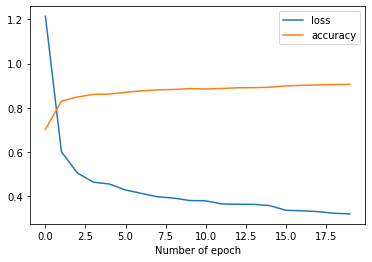

In [34]:
# visulise training loss and accuracy
df = pd.DataFrame(history.history)

ax = df[["loss", "accuracy"]].plot()
ax.set_xlabel('Number of epoch')

Evaluate model on test data

In [35]:
model.evaluate(x_test,y_test)
# read the maximum accuracy from test results
df = pd.DataFrame(history.history)
accuracy = df[['accuracy']]
accuracy.to_numpy()
max_accuracy = np.max(accuracy) # take the maxmum or the last? #TODO
print(str(max_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3150 - accuracy: 0.9085
accuracy    0.905583
dtype: float64


Visualise prediction result from test data

In [36]:
# this function return the predicted label of an image in test folder
def get_label_from_prediction(model, labels, img):

    reshape = tf.reshape(img,[1,784])
    return labels[np.argmax(model.predict(reshape))]


In [37]:
# list the labels as an array
labels = np.unique(y_train)

1/1 [==============================] - 0s 18ms/step


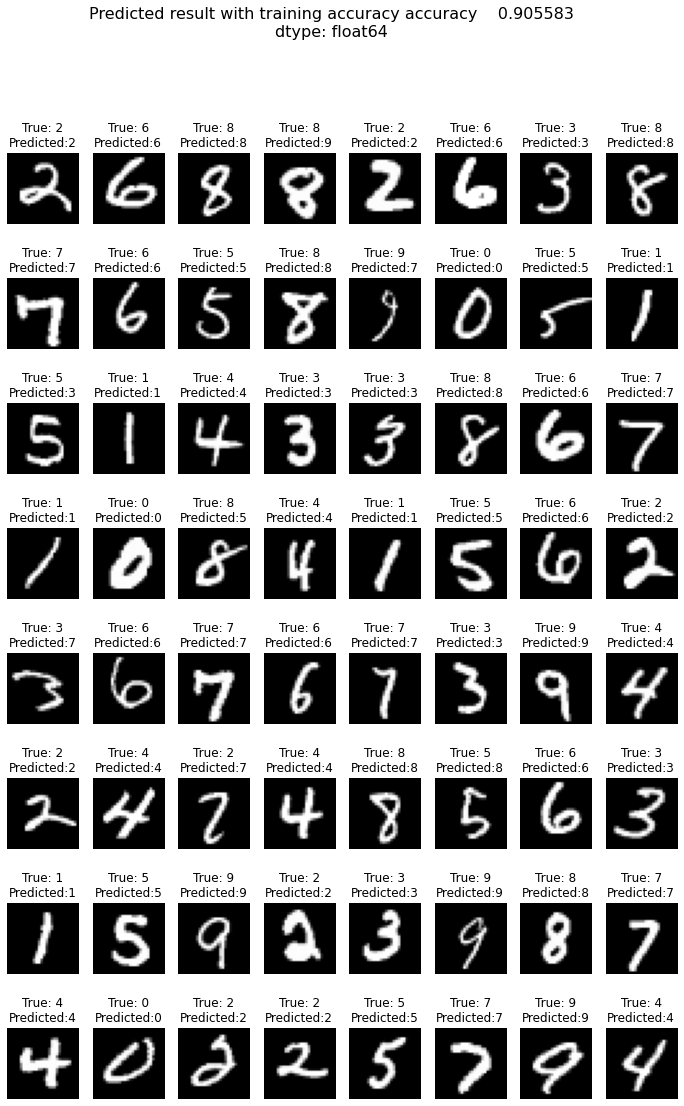

In [38]:
from matplotlib.colorbar import constrained_layout
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = x_test.shape

fig, axes = plt.subplots(nrows=8,ncols=8,constrained_layout=False, figsize=(12,18))
#fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    #x_random_reshaped = x_train[random_index].reshape((28,28)).T
    x_random_reshaped = x_test[random_index].reshape((28,28))
    #x_random_reshaped = x_test[random_index]
    # Display the image
    ax.imshow(x_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    #prediction = model.predict(x_train[random_index].reshape(1,784))
    prediction = get_label_from_prediction(model, labels, x_test[random_index])
    
    # Display the label above the image
    ax.set_title(f"True: {y_test[random_index]}\nPredicted:{prediction}")
    ax.set_axis_off()
#fig.suptitle(f"Predicted result with training accuracy {max_accuracy}", fontsize=16)
plt.show()